## Database cleaning and Information extraction

In [94]:
import pandas as pd
import numpy as np

# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings
warnings.filterwarnings('ignore')

## INSTRUCTIONS
### Cleaning requirements
Load the energy data from the file `assets/Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](assets/Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **Energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]`

Convert `Energy Supply` to gigajoules (**Note: there are 1,000,000 gigajoules in a petajoule**). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```
"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong" 
```


There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`.  `'Switzerland17'` should be `'Switzerland'`.

Next, load the GDP data from the file `assets/world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries: 
```
"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong
```

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `assets/scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*The final dataframe should return a DataFrame with 20 columns and 15 entries, and the rows of the DataFrame should be sorted by "Rank".*

### Information extraction
- Rank the countries based on average GDP during the last 10 years
- By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?
- What is the mean energy supply per capita
- What is the country with the max % of renewable energy
- Create a column that estimates the population using Energy Supply and Energy Supply per capita. What is the third most populous country according to this estimate?
- Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita?
- Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.
- Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```
- Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90


## Data cleaning process

In [95]:
# Importing dataset Energy indicators
energy = pd.read_excel('assets/Energy Indicators.xls', index_col=None, usecols='C:F', skiprows=17, skipfooter=38)
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

# Replacing '...' into missing values
energy['Energy Supply'] = energy['Energy Supply'].replace('...', np.NaN)

# Converting energy supplu from petajoules to gigajoules
energy['Energy Supply'] = energy['Energy Supply']*1000000

# Replacing given country names
energy['Country'] = energy['Country'].replace({"Republic of Korea": "South Korea",
                                                "United States of America": "United States",
                                                "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                                                "China, Hong Kong Special Administrative Region": "Hong Kong"})

# Searching for additional country names
energy['Country'].unique()

# Replacing names with () or numbers
energy['Country'] = energy['Country'].replace('\s\(.+\)', '', regex=True)
energy['Country'] = energy['Country'].replace('\d', '', regex=True)

energy['Country'].unique()

energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10,78.669280
1,Albania,1.020000e+08,35,100.000000
2,Algeria,1.959000e+09,51,0.551010
3,American Samoa,NaN,...,0.641026
4,Andorra,9.000000e+06,121,88.695650


In [96]:
# Importing World bank dataset
GDP = pd.read_csv('assets/world_bank.csv', index_col=None, skiprows=4)

# Renaming given countries
GDP['Country Name'] = GDP['Country Name'].replace({"Korea, Rep.": "South Korea", 
                                                    "Iran, Islamic Rep.": "Iran",
                                                    "Hong Kong SAR, China": "Hong Kong"})

GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [97]:
# Importing Sciamgo database
scimen = pd.read_excel('assets/scimagojr-3.xlsx')
scimen = scimen.head(15)

In [98]:
import re
# Joining databases

# Limiting only 10 years of GDP
GDP_years = [str(x) for x in range(2006,2016)]
GDP_cols = ['Country Name']
for x in GDP_years: GDP_cols.append(x)

GDP = GDP[GDP_cols]

# Obtaining top15 scimen countries
top_15 = list(scimen.sort_values(by='Rank').head(15)['Country'])

# Funtion to Verify 15 names correspond in the other datasets
def review_names(df, column_name): 
    column_name = column_name
    name_issues = []
    for country1 in top_15:
        if country1 not in list(df[column_name]):
            name_issues.append(country1)
            print(country1)
    if len(name_issues) == 0:
        print('No name issues\n')
    else:
        return name_issues

# Checking GDP dataset names
print('Checking GDP names:')
review_names(GDP, 'Country Name')
print('Checking energy names:')
review_names(energy, 'Country')

# Looks like we have issues with the energy dataset with the countries United States and United Kingdom
# Both have united so let's look into those names with "United" in their name
print('\nCountries "United":')
for name in energy['Country']:
    if re.search('United', name):
        print(name)

Checking GDP names:
No name issues

Checking energy names:
United States
United Kingdom

Countries "United":
United Arab Emirates
United Kingdom of Great Britain and Northern Ireland
United Republic of Tanzania
United States of America
United States Virgin Islands


Looks like United States and United Kingdom has different names in the energy database, let's replace them with the names in the scimen dataset and review the names again

In [99]:
# Replacing country names
energy['Country'] = energy['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
energy['Country'] = energy['Country'].replace('United States of America', 'United States')
mask_united = (energy['Country'] == 'United States') | (energy['Country'] == 'United Kingdom')
energy[mask_united]

# Reviewing names
print('Checking energy names:')
review_names(energy, 'Country')

Checking energy names:
No name issues



Finally, we are going to join the datasets based on the name intersection

In [100]:
# Merging datasets
merged = pd.merge(scimen, energy, how='inner', left_on='Country', right_on='Country').merge(GDP, how='inner', left_on='Country', right_on='Country Name')

# Setting country column as index
merged = merged.set_index('Country')
merged

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93,19.754910,...,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286,11.570980,...,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149,10.232820,...,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124,10.600470,...,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214,17.288680,...,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296,61.945430,...,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165,17.901530,...,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26,14.969080,...,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166,17.020280,...,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


Finally let's confirm we have all the column required and the correct dimensions on the dataframe

In [101]:
# Checking columns
merged.drop(columns='Country Name', inplace=True)
col_reqs = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 
            'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', 
            '2010', '2011', '2012', '2013', '2014', '2015']

# Comparing required lists with output generated
if all(merged.columns == col_reqs):
    print('Lists are identical')
else:
    print('WARNING!')

# Checking shape
shape = (15,20)
if merged.shape == shape:
    print('Correct dimensions')

Lists are identical
Correct dimensions


## Information extraction

#### What tre the top 15 countries for average GDP over the last 10 years?
```
{'United States': '15,364,344,302,990',
 'China': '6,348,608,932,836',
 'Japan': '5,542,207,638,235',
 'Germany': '3,493,025,339,072',
 'France': '2,681,724,635,761',
 'United Kingdom': '2,487,906,661,418',
 'Brazil': '2,189,794,143,774',
 'Italy': '2,120,175,089,933',
 'India': '1,769,297,396,603',
 'Canada': '1,660,647,466,307',
 'Russian Federation': '1,565,459,478,480',
 'Spain': '1,418,078,278,145',
 'Australia': '1,164,042,729,991',
 'South Korea': '1,106,714,508,244',
 'Iran': '444,155,754,051'}
```


In [102]:
# We are going to create an additional column called GDP10 representing the avg GDP of the last 10 years
# Creating a function that generates a new column for the avg GDP and return the df with the new column
def GDP_10(merged):
    merged['avgGDP'] = merged[['2006', '2007', '2008',
        '2009', '2010', '2011', '2012', '2013', '2014', '2015']].mean()
    return merged

# Applying the function
merged = merged.apply(GDP_10, axis=1)

# Sorting by the value of this new column in descending order
merged = merged.sort_values(by=['avgGDP'], ascending=False)

# Formatting
merged['avgGDP'] = merged.apply(lambda x: "{:,}".format(int(x['avgGDP'])), axis=1)

#Final series
top15_GDP = merged['avgGDP']
(top15_GDP)

Country
United States         15,364,344,302,990
China                  6,348,608,932,836
Japan                  5,542,207,638,235
Germany                3,493,025,339,072
France                 2,681,724,635,761
United Kingdom         2,487,906,661,418
Brazil                 2,189,794,143,774
Italy                  2,120,175,089,933
India                  1,769,297,396,603
Canada                 1,660,647,466,307
Russian Federation     1,565,459,478,480
Spain                  1,418,078,278,145
Australia              1,164,042,729,991
South Korea            1,106,714,508,244
Iran                     444,155,754,051
Name: avgGDP, dtype: object

#### By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?
The sixth highest country in terms of avg GDP is United Kingdom, which from 2006 to 2015 decreased its' GDP by 246,702,696,075

In [103]:
# Sorting the dataframe by avgGDP
merged = merged.sort_values(by=['avgGDP'], ascending=False)
change = merged.iloc[5]['2006'] - merged.iloc[5]['2015']
change

-246702696075.3999

#### Find the Mean energy supply per capita

In [104]:
# Finding mean energy supply per capita for the countries
mean_energy_pc = np.average(merged['Energy Supply per Capita'])

print('The mean energy supplu per capita for the top 15 countries is {mean:,}'.format(mean = mean_energy_pc))

The mean energy supplu per capita for the top 15 countries is 157.6


#### Find the country with the maximum % of renewable energy

In [105]:
# Finding id of the maximum value in the column of renewable
max_renew_country = merged['% Renewable'].idxmax()
# Finding the max value of the column
max_renew_pct = merged['% Renewable'].max()
# Creating tupple
max_tupple = (max_renew_country, max_renew_pct)
max_tupple

('Brazil', 69.64803)

#### Create a new column that is the ratio of Self-Citations to Total Citations. 
#### What is the maximum value for this new column, and what country has the highest ratio?

In [106]:
# Creating ratio
merged['Citations ratio'] = merged['Self-citations'] / merged['Citations']
#Finding max
max_ratio_country = merged['Citations ratio'].idxmax()
max_ratio_ratio = merged['Citations ratio'].max()

ratio_tup = (max_ratio_country, max_ratio_ratio)
ratio_tup

('China', 0.6893126179389422)

#### Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
#### What is the third most populous country according to this estimate?

In [107]:
# Creating populationestimate
merged['Pop est'] = merged['Energy Supply'] / merged['Energy Supply per Capita']

# Filtering
merged = merged.sort_values(by=['Pop est'], ascending=False)

# Finding 3rd highest populated country
country_3 = merged.index[2]
country_3


'United States'

#### Create a column that estimates the number of citable documents per person. 
#### What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).


In [108]:
merged.columns

Index(['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'avgGDP',
       'Citations ratio', 'Pop est'],
      dtype='object')

In [109]:
# Creating citable documents per capita 
merged['Citable Docs per Capita'] = merged['Citable documents'] / merged['Pop est']

# Obtaning correlation coefficient
merged[['Citable Docs per Capita', 'Energy Supply per Capita']].corr()
merged['Citable Docs per Capita'].corr(merged['Energy Supply per Capita'], method='pearson')

0.7940010435442942

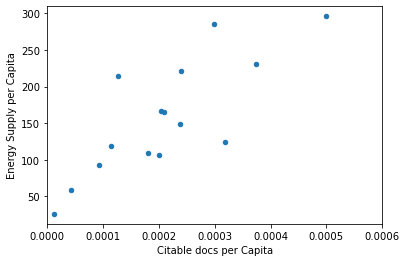

In [110]:
def plot_corr(Top15):
    import matplotlib as plt
    %matplotlib inline
    
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])
plot_corr(merged)

#### Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

In [111]:
# Obtaining median renewable
median_renew = np.median(merged['% Renewable'])
print(median_renew)
# Generating column
merged['High Renew'] = merged['% Renewable'].apply(lambda x: 1 if x > median_renew else 0)
merged['High Renew'].head()

17.02028


Country
China                 1
India                 0
United States         0
Brazil                1
Russian Federation    1
Name: High Renew, dtype: int64

#### Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each continent.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

In [112]:
# Generating Continent column
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

merged['Continent'] = merged.index
merged['Continent'] = merged['Continent'].replace(ContinentDict)

# Grouping
continent_df = merged.groupby('Continent').agg({'Pop est': (np.sum, np.average, np.std)})
continent_df

Pop est                            
                        sum       average           std
Continent                                              
Asia           2.898666e+09  5.797333e+08  6.790979e+08
Australia      2.331602e+07  2.331602e+07           NaN
Europe         4.579297e+08  7.632161e+07  3.464767e+07
North America  3.528552e+08  1.764276e+08  1.996696e+08
South America  2.059153e+08  2.059153e+08           NaN

#### Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results)

e.g. 12345678.90 -> 12,345,678.90

In [114]:
merged['Pop est'] = merged['Pop est'].apply(lambda x: '{:,}'.format(int(x)))

In [120]:
merged['Pop est']

Country
China                 1,367,645,161
India                 1,276,730,769
United States           317,615,384
Brazil                  205,915,254
Russian Federation      143,500,000
Japan                   127,409,395
Germany                  80,369,696
Iran                     77,075,630
United Kingdom           63,870,967
France                   63,837,349
Italy                    59,908,256
South Korea              49,805,429
Spain                    46,443,396
Canada                   35,239,864
Australia                23,316,017
Name: Pop est, dtype: object

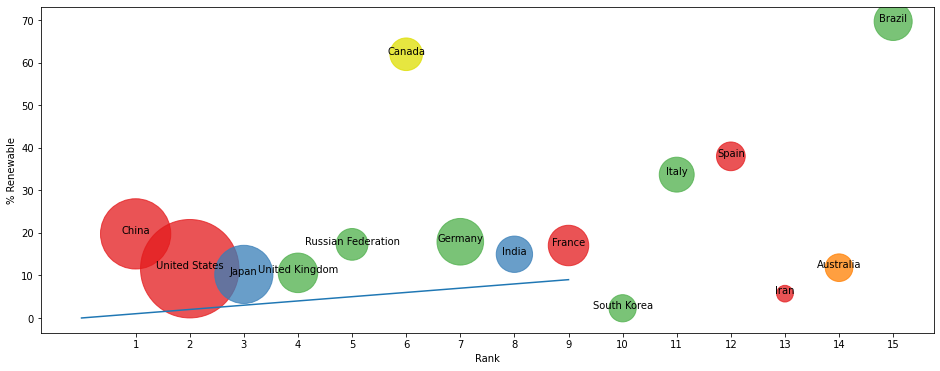

In [124]:
def plot(Top15):
    import matplotlib as plt
    import matplotlib.pyplot as plt1
    %matplotlib inline

    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    ax.plot(range(10))
    #ax.set_xlabel('X-axis')
    #ax.set_ylabel('Y-axis')

    #ax.spines['bottom'].set_color('yellow')
    #ax.spines['top'].set_color('yellow')
    #ax.xaxis.label.set_color('yellow')
    #ax.yaxis.label.set_color('yellow')
    #ax.tick_params(axis='x', colors='yellow')
    #ax.tick_params(axis='y', colors='yellow')

    
    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

plot(merged)